<a href="https://colab.research.google.com/github/drpetros11111/Tensorflow_Portilia/blob/RNN/01_RNN_Time_Series_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# RNN Example for Time Series

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

## Data

Release: Advance Monthly Sales for Retail and Food Services  
Units:  Millions of Dollars, Not Seasonally Adjusted

Frequency:  Monthly

The value for the most recent month is an advance estimate that is based on data from a subsample of firms from the larger Monthly Retail Trade Survey. The advance estimate will be superseded in following months by revised estimates derived from the larger Monthly Retail Trade Survey. The associated series from the Monthly Retail Trade Survey is available at https://fred.stlouisfed.org/series/MRTSSM448USN

Information about the Advance Monthly Retail Sales Survey can be found on the Census website at https://www.census.gov/retail/marts/about_the_surveys.html

Suggested Citation:
U.S. Census Bureau, Advance Retail Sales: Clothing and Clothing Accessory Stores [RSCCASN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/RSCCASN, November 16, 2019.

https://fred.stlouisfed.org/series/RSCCASN

In [3]:
df = pd.read_csv('/content/RSCCASN.csv',index_col='DATE',parse_dates=True)

# Reed a csv file with a dates column
This line uses the pandas library (pd) to read data from a CSV file and create a DataFrame named df.

-----------------------
Here's a step-by-step explanation:

## pd.read_csv():

This function is the core of the operation. It reads data from a CSV (Comma-Separated Values) file into a pandas DataFrame, which is a table-like data structure.

##/content/RSCCASN.csv:
This is the path to the CSV file containing the data.

In Google Colab, /content/ typically refers to your current working directory.

##index_col='DATE':

This argument specifies that the column named 'DATE' in the CSV file should be used as the index of the DataFrame.

The index provides a way to label and access rows in the DataFrame.

##parse_dates=True:
This argument instructs pandas to attempt to parse the dates in the 'DATE' column and convert them into datetime objects.

This is important for time series analysis, as it allows you to work with dates and times in a meaningful way.

In simpler terms, this line of code is saying:

1. Read the data from the file 'RSCCASN.csv',

###2. Use the 'DATE' column as the index of the data, and

3. Try to understand the dates in that column."

This prepares the data for further analysis, especially for time series tasks like forecasting, which is the focus of the notebook's code.

In [4]:
df.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [7]:
df.columns = ['Sales']
df.head()

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


<Axes: xlabel='DATE'>

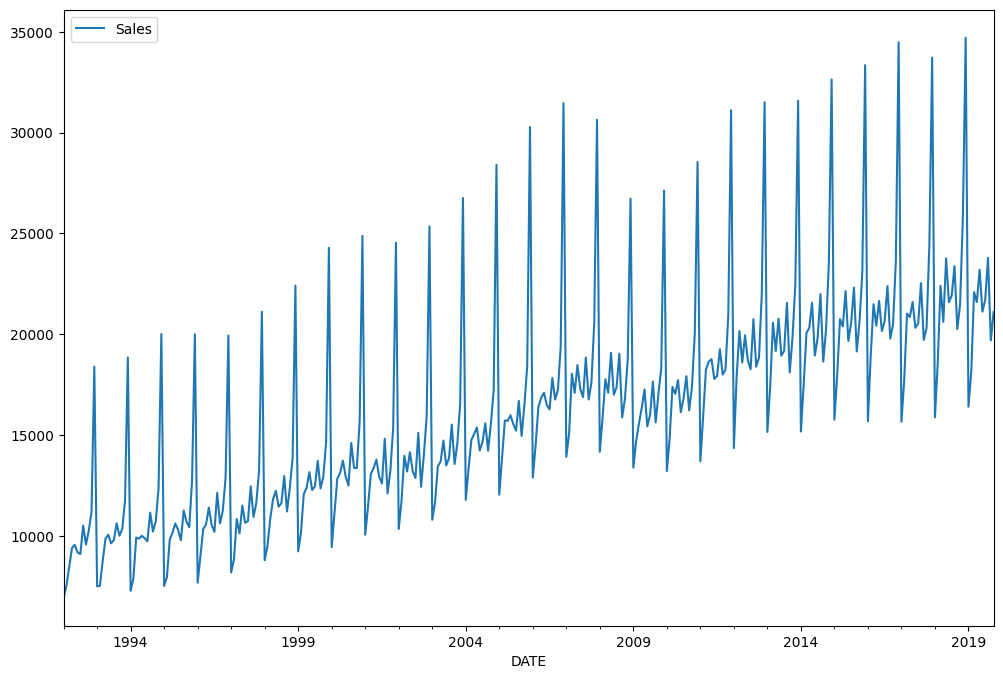

In [6]:
df.plot(figsize=(12,8))

## Train Test Split

In [8]:
len(df)

334

Data is monthly, let's forecast 1.5 years into the future.

In [9]:
len(df)- 18

316

In [10]:
test_size = 18

In [11]:
test_ind = len(df)- test_size

In [12]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

# Split Time-Series Data in Train & Test
These lines are used to split the DataFrame df into two parts: a training set (train) and a testing set (test).

This is a common practice in machine learning to evaluate the performance of a model on unseen data.
--------------------------

Here's a step-by-step explanation:

##df.iloc:
This is used for integer-location based indexing of the DataFrame df.

It allows you to select rows and columns by their numerical positions.

##[:test_ind]:

This slice selects all rows from the beginning of the DataFrame up to (but not including) the index specified by test_ind.

This portion of the data is assigned to the train DataFrame, and will be used to train the machine learning model.

##[test_ind:]:
This slice selects all rows from the index specified by test_ind to the end of the DataFrame.

This portion of the data is assigned to the test DataFrame, and will be used to evaluate the performance of the trained model on unseen data.

In simpler terms, these lines are saying:

"Take the data in df from the beginning up to the index test_ind and store it in a new DataFrame called train."

"Take the data in df from the index test_ind to the end and store it in a new DataFrame called test."

This split ensures that the model is trained on one part of the data and tested on a different part, which helps to assess its ability to generalize to new, unseen data. I hope this explanation is clear. Let me know if you have any other questions.

In [13]:
train

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585


In [14]:
test

,Sales
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260
2018-10-01,21473
2018-11-01,25831
2018-12-01,34706
2019-01-01,16410


## Scale Data

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
# IGNORE WARNING ITS JUST CONVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler.fit(train)

MinMaxScaler()

In [18]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [42]:
scaled_train

array([[0.        ],
       [0.02127505],
       [0.05580163],
       [0.08942056],
       [0.09512053],
       [0.08146965],
       [0.07860151],
       [0.12979233],
       [0.09566512],
       [0.1203892 ],
       [0.15426227],
       [0.41595266],
       [0.02047633],
       [0.02127505],
       [0.06636654],
       [0.10633895],
       [0.11345484],
       [0.09791606],
       [0.10368864],
       [0.13396747],
       [0.11163956],
       [0.12372931],
       [0.17506535],
       [0.43250799],
       [0.0124165 ],
       [0.03499855],
       [0.10829945],
       [0.10641156],
       [0.11149434],
       [0.10728289],
       [0.10154662],
       [0.1531731 ],
       [0.11904589],
       [0.13767064],
       [0.19663085],
       [0.47480395],
       [0.02105722],
       [0.03714058],
       [0.10445106],
       [0.11726692],
       [0.13367703],
       [0.12209556],
       [0.10332559],
       [0.1570578 ],
       [0.13694453],
       [0.12710572],
       [0.21104415],
       [0.474

In [43]:
scaled_test

array([[0.61087714],
       [0.53191258],
       [0.54389341],
       [0.59697212],
       [0.4836625 ],
       [0.52770113],
       [0.68592071],
       [1.00813244],
       [0.34388615],
       [0.40647691],
       [0.55021057],
       [0.53220302],
       [0.59040081],
       [0.51499419],
       [0.53645077],
       [0.61185739],
       [0.46314987],
       [0.51463114]])

In [40]:
scaled_train[0]

array([0.])

In [41]:
scaled_test[0]

array([0.61087714])

# Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

In [24]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [25]:
# Let's redefine to get 12 months back and then predict the next month out
length = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

# Generate Monthly Data

These lines are crucial for preparing the time series data for training a recurrent neural network (RNN)

    length = 12
    generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

------------------------------------

 Here's a step-by-step explanation:

##length = 12:

This line sets the variable length to 12.

In the context of time series analysis, this typically represents the number of previous time steps to consider when making a prediction.

In other words, the model will use the past 12 months of data to predict the next month's value.

##generator = TimeseriesGenerator(...):
This line creates a TimeseriesGenerator object, which is a utility class provided by Keras for generating batches of time series data.

##scaled_train:

This is the input data for the generator, which is the scaled training data.

##scaled_train:
This is the target data for the generator, which is also the scaled training data.

In this case, the model is trying to predict the next value in the sequence based on the previous values.

##length=length:
This specifies the length of the input sequences, which is set to 12 as defined in the previous line.

##batch_size=1:
This sets the batch size to 1, which means that the generator will produce one sample at a time.

In simpler terms, these lines are saying:

"We want to use the past 12 months of data to make predictions."

Create a data generator that will take the scaled training data and create batches of input sequences (of length 12) and their corresponding target values."

This setup is essential for training an RNN, as it provides the model with the necessary historical context to learn patterns and make accurate predictions.

I hope this explanation is clear. Let me know if you have any other questions.

------------------
----------------
#Note 1- Scaled Data
Scaling data refers to the process of transforming the values of your features (variables) to a specific range.

This is often a crucial step in preparing data for machine learning algorithms, especially those that are sensitive to the scale of the input features.

---------------
##Why Scale Data?

###Improved Model Performance:

Many machine learning algorithms, such as those based on distance calculations (e.g., k-nearest neighbors, support vector machines) or gradient descent (e.g., linear regression, neural networks), can be negatively affected if features have vastly different scales.

Scaling ensures that all features contribute equally to the learning process.

###Faster Convergence:
Scaling can help algorithms converge faster to the optimal solution by preventing features with larger values from dominating the optimization process.

##Avoiding Bias:
In some cases, unscaled data can introduce bias into the model.

For example, if one feature has a much larger range than others, it might disproportionately influence the model's predictions.

--------------------
#How is Data Scaled?

There are several common methods for scaling data, including:

##Standardization (Z-score normalization)
Transforms data to have zero mean and unit variance.

#Normalization (Min-Max scaling):
Rescales data to a specific range, typically between 0 and 1.

-------------------------
#In this Code:

The code you provided uses Min-Max scaling with the MinMaxScaler class from scikit-learn.

This scaler transforms the data to fit within the range of 0 to 1.


    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    scaler.fit(train)
    scaled_train = scaler.transform(train)
    scaled_test = scaler.transform(test)

-----------------------
Here's what's happening:

##1. A MinMaxScaler object is created.
The scaler is fitted to the training data (train).

##2.This calculates the minimum and maximum values of the training data.

##3. The training and testing data are transformed using the fitted scaler.
This rescales the data to the range of 0 to 1 based on the minimum and maximum values learned from the training data.

##Min-Max Scaling Formula:

The formula for Min-Max scaling is as follows:


    X_scaled = (X - X_min) / (X_max - X_min)

where:

    X_scaled is the scaled value
    X is the original value
    X_min is the minimum value of the feature
    X_max is the maximum value of the feature

----------------------
##Why 0 to 1?

###Normalization:

Min-Max scaling is a form of normalization.

Normalization typically aims to bring data within a specific range, often 0 to 1, to make it more consistent and comparable.

###Simplicity and Interpretation:
The 0 to 1 range is intuitive and easy to understand.

It represents the relative position of a data point within the distribution of the feature.

A value of 0 indicates the minimum value, 1 indicates the maximum value, and values in between represent intermediate positions.

##Algorithm Compatibility:
Many machine learning algorithms work well with data scaled to the 0 to 1 range.

This is particularly true for algorithms that use distance calculations or gradient descent, as mentioned earlier.

##Applying the Formula:

When you apply the Min-Max scaling formula, the minimum value of the feature (X_min) will be transformed to 0, and the maximum value (X_max) will be transformed to 1.

All other values will be scaled proportionally between 0 and 1 based on their original position within the range.

##Benefits in Your Code:

In your code, scaling the data to the 0 to 1 range helps the LSTM model learn more effectively.

LSTM networks, like other neural networks, can benefit from having input data within a specific range.

This can lead to faster convergence and improved performance.

##Alternatives:

While 0 to 1 is a common and often preferred range for Min-Max scaling, you can also specify a different range if needed.

The MinMaxScaler class in scikit-learn allows you to set the feature_range parameter to define a custom range.

However, the 0 to 1 range is often a good starting point and is widely used in practice.

-----------------
#In summary
Scaled data is data that has been transformed to a specific range to improve the performance and stability of machine learning algorithms.

The code you provided uses Min-Max scaling to rescale the data to the range of 0 to 1. I hope this explanation is clear.

-------------------
------------------------
---------------------------
#Note 2 - Explaining the 'scaled_train' in the Generator's variables

The reason scaled_train is used twice is because it's providing both the input data and the target data for the generator.

---------------------------
##First scaled_train (data):
This is the input data that the generator will use to create the sequences of past values for the model to learn from.

Each sequence will have a length of length (which is 12 in your case).

##Second scaled_train (targets):

This is the target data that the generator will provide as the desired output for each input sequence.

In this case, the target is the value that immediately follows the input sequence.

Why the same data for input and target?

In this specific scenario, the goal is to train a model to predict the next value in the time series based on the previous length values.

Since you're using the same scaled_train data for both input and target, you're essentially saying:

"Given a sequence of 12 past values from scaled_train, predict the next value in scaled_train."

This is a common approach in time series forecasting where the model learns to predict the future based on past patterns within the same dataset.

-------------------
#Example:

Let's say your scaled_train data looks like this:
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

With length = 12, the generator would create the following input-target pairs:

Input:
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] Target: [13]

Input:
     [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

Target: [14]

Input:
[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

Target: [15]

And so on. The model learns to map the input sequences to the corresponding target values, effectively learning the patterns within the time series data.


In [21]:
# What does the first batch look like?
X,y = generator[0]

In [22]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.         0.02127505 0.05580163 0.08942056 0.09512053 0.08146965
 0.07860151 0.12979233 0.09566512 0.1203892  0.15426227 0.41595266]
Predict this y: 
 [[0.02047633]]


### Create the Model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [27]:
# We're only using one feature in our time series
n_features = 1

# Define the No of the model features
This line is setting a variable called n_features to 1.

In the context of your code, it's indicating that your time series data has only one feature (or variable) that you're using to make predictions.

---------------------
##Time Series Features:

In time series analysis, a feature represents a measurable property or characteristic of the data that changes over time.

For example, in your case, the feature is likely "Sales," which is the value you're trying to predict for future time periods.

--------------------
#Why n_features = 1?

The dataset (RSCCASN.csv) contains only one column representing the sales data for each date.

Therefore, you're using this single feature ("Sales") to train your LSTM model.

--------------------
#Impact on the Model:

This setting (n_features = 1) is important because it determines the input shape of your LSTM model.

The input shape tells the model how many features to expect for each time step. Since you have only one feature, the input shape for your LSTM layer is defined as (length, n_features), which in your case is (12, 1).

----------------------------
#Multi-Feature Time Series:

If you had a time series dataset with multiple features (e.g., sales, temperature, marketing spend), then n_features would be set to the number of features you're using.

For instance, if you were using three features, you would set n_features = 3, and the input shape for your LSTM layer would be (length, 3).

-----------------------
#In summary
The line n_features = 1 in your code simply indicates that you're working with a time series dataset that has only one feature, which is used as input to your LSTM model for forecasting.

I hope this explanation is clear. Let me know if you have any other questions.

In [28]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Use RELU in LSTM
In the code you provided, the LSTM layer is using ReLU (Rectified Linear Unit) activation instead of sigmoid:

    model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))

-------------------------
This is a less common approach, but it's possible to use ReLU in LSTMs for the following reasons:

#Learning Non-Linear Relationships:

ReLU introduces non-linearity into the LSTM layer, which can help the model learn more complex patterns in the data.

#Avoiding Vanishing Gradients:
ReLU is less prone to the vanishing gradient problem, which can hinder the training of deep networks.

Vanishing gradients occur when the gradients during backpropagation become very small, making it difficult for the network to update its weights effectively.

#Experimentation:

It's common to experiment with different activation functions to see which one works best for a particular task.

In some cases, ReLU might lead to better performance than sigmoid for LSTMs.
Why It Might Work:

While ReLU is not the typical choice for LSTM gates, it can still work because the gates are ultimately controlling the flow of information.

Even with ReLU, the output values will still vary, allowing the gates to regulate the information flow to some extent.

-------------------
#Important Considerations:

##Gate Behavior:
Using ReLU for LSTM gates might change their behavior compared to sigmoid.

The gates might not strictly close or open, but rather modulate the information flow in a different way.

##Performance:
The effectiveness of using ReLU in LSTMs depends on the specific dataset and task.

It's always best to experiment and compare different activation functions to see which one yields the best results.

---------------------
#In summary
while sigmoid is the traditional choice for LSTM gates, using ReLU is a possible alternative that can introduce non-linearity, mitigate vanishing gradients, and potentially improve performance in some cases.

It's important to understand the potential impact on gate behavior and to experiment to determine the best activation function for your specific task

In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,705 (479.32 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 81,804 (319.55 KB)

# Discerning the Model Summary
These lines provide a summary of the number of parameters in your neural network model and its optimizer.

--------------------------------
#1. Total params: 122,705 (479.32 KB)

##1. Total params:
This refers to the total number of parameters (weights and biases) in your entire neural network model.

In this case, your model has 122,705 parameters.

##(479.32 KB):
This indicates the memory size occupied by these parameters, approximately 479.32 kilobytes.

This is important for understanding the memory requirements of your model.

----------------------
##2. Trainable params: 40,901 (159.77 KB)

###Trainable params:
These are the parameters that will be adjusted during the training process to optimize the model's performance.

In this case, 40,901 parameters are trainable.

##(159.77 KB):
This shows the memory size occupied by the trainable parameters, approximately 159.77 kilobytes.

------------------------------
#3. Non-trainable params: 0 (0.00 B)

Non-trainable params: Some models might have parameters that are fixed and not updated during training.

Your model currently has 0 non-trainable parameters.

##(0.00 B):
This confirms that no memory is used for non-trainable parameters.

-------------------------
#4. Optimizer params: 81,804 (319.55 KB)

##Optimizer params:
This refers to the parameters used by the optimizer algorithm you chose to train your model (e.g., Adam, SGD).

Optimizers have their own internal parameters that control how they update the model's weights during training. Your optimizer has 81,804 parameters.

##(319.55 KB):
This indicates the memory size occupied by the optimizer's parameters, approximately 319.55 kilobytes.

In essence, these lines provide a summary of the size and structure of your model and its optimizer in terms of parameter count and memory usage.

-------------------------
#Why is this information important?

##Model Complexity:
A higher number of parameters generally indicates a more complex model, which might have more capacity to learn complex patterns but could also be prone to overfitting.

##Memory Usage:
The memory size of your model is crucial for deployment and training, especially when dealing with limited resources or large datasets.

##Training Time:
The number of trainable parameters influences the time it takes to train your model. More parameters typically lead to longer training times.

---------------------------------
#Note:
The specific values for these parameters depend on the architecture of your neural network (number of layers, neurons, etc.) and the optimizer you are using.

### EarlyStopping and creating a Validation Generator

NOTE: The scaled_test dataset size MUST be greater than your length chosen for your batches. Review video for more info on this.

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [31]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1)

In [33]:
# fit model
# Use model.fit instead of model.fit_generator
model.fit(generator, epochs=20,
          validation_data=validation_generator,
          callbacks=[early_stop])

Epoch 1/20
 22/304 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0722

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


304/304 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0274 - val_loss: 0.0273
Epoch 2/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0234 - val_loss: 0.0083
Epoch 3/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0149 - val_loss: 0.0266
Epoch 4/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0192 - val_loss: 0.0014
Epoch 5/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0078 - val_loss: 0.0083
Epoch 6/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0040 - val_loss: 0.0014


In [34]:
losses = pd.DataFrame(model.history.history)

<Axes: >

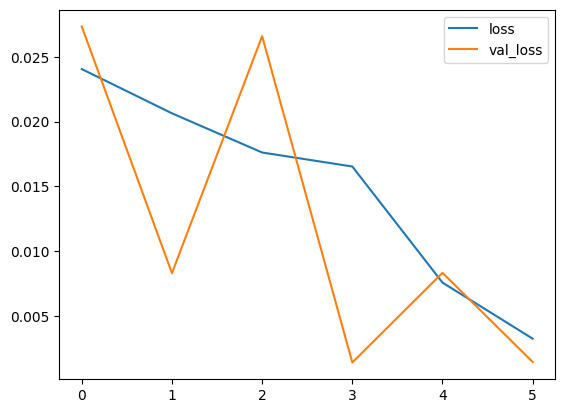

In [35]:
losses.plot()

## Evaluate on Test Data

In [36]:
first_eval_batch = scaled_train[-length:]

# Slicing the scaled_train array
This line is slicing the scaled_train array (which contains the training data after scaling) to create a new array called first_eval_batch.


---


Here's a breakdown of what's happening:

##scaled_train:

This is your training data, presumably a NumPy array or a similar data structure.

##[-length:]:

This is a slicing operation.

It uses negative indexing and slicing to extract a portion of the scaled_train array.

##-length:
This refers to the index starting from the end of the array.

length is likely a variable already defined, representing how many data points you want to include in your evaluation batch.

For example, if length is 10, -length would be -10, meaning it starts 10 positions from the end of the array.

##:
This means "take all elements from the starting index (-length) to the end of the array".

In essence, the line is taking the last length number of data points from your scaled_train array and assigning them to the variable first_eval_batch.

This is commonly done to create an initial evaluation set from your training data.

-----------------------

#Example:

Let's say scaled_train contains the numbers [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] and length is 3.

Then, scaled_train[-length:] would be equivalent to scaled_train[-3:], which would extract the last 3 elements: [8, 9, 10].

These elements would then be assigned to first_eval_batch.

In [38]:
model.predict(first_eval_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


array([[0.06032008],
       [0.06237016],
       [0.06203847],
       [0.05859658],
       [0.06326244],
       [0.06239339],
       [0.05478641],
       [0.03235972],
       [0.06815378],
       [0.06482125],
       [0.05885114],
       [0.06191146]], dtype=float32)

# Discerning the Output
The output  is the LSTM model's prediction for the next time step, given the input first_eval_batch.



---


Here's a breakdown:

##first_eval_batch:

This contains the input data you're feeding to the model for prediction.

Based on your previous code, it likely represents a sequence of past data points.

It is of shape (1, 12, 1) where 12 represents the sequence length.

##model.predict():
This function takes the input data (first_eval_batch) and passes it through your trained neural network to generate predictions.

------------------
#Output:
The output you're getting is an array of shape (12, 1).

#Shape (12, 1):

This indicates that the model is predicting 12 values.

Each of these values corresponds to a prediction for a single time step in the future, since the input data has a sequence length of 12.

##Values (e.g., 0.06032008, 0.06237016...):

These are the actual predicted values for each time step.

They are likely scaled, meaning they need to be inversely transformed back to the original scale of your data to be meaningful.

In simpler terms, your model is taking the past 12 time steps as input and predicting the next value for each of these 12 time steps.

-------------------------
#Important Considerations:

##Scaling:
Since the data is scaled before training (which is common practice), you'll need to apply the inverse scaling to these predictions to get them back to the original units of your data.

##Context:
The specific meaning of these values depends on what you are trying to predict.

If you are predicting stock prices, these values would represent the predicted stock prices for the next 12 time steps.

If you are predicting temperature, these values would represent the predicted temperatures, and so on.

##Model Performance:
You'll need to evaluate these predictions against actual values using appropriate metrics (e.g., mean squared error, root mean squared error) to determine how well your model is performing.

---------------------
#Example:

Let's say you're predicting stock prices. The output could be interpreted as follows:

[0.06032008]: Predicted stock price for the first time step in the future.

[0.06237016]: Predicted stock price for the second time step in the future.
...

[0.06191146]: Predicted stock price for the twelfth time step in the future.
Remember to inverse transform these values to get them in the actual price units.

In [39]:
scaled_test[0]

array([0.61087714])

Now let's put this logic in a for loop to predict into the future for the entire test range.

----

**NOTE: PAY CLOSE ATTENTION HERE TO WHAT IS BEING OUTPUTED AND IN WHAT DIMENSIONS. ADD YOUR OWN PRINT() STATEMENTS TO SEE WHAT IS TRULY GOING ON!!**

In [45]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):

    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]

    # store prediction
    test_predictions.append(current_pred)

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

## Inverse Transformations and Compare

In [50]:
import numpy as np

test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):

    # Ensure current_batch has the correct shape before prediction.
    current_batch = current_batch.reshape((1, length, n_features))

    try:
        # get prediction 1 time stamp ahead ([0] is for grabbing just the number)
        current_pred = model.predict(current_batch)[0]
    except ValueError as e:
        print("Error during prediction:", e)
        print("Shape of current_batch during error:", current_batch.shape)
        break

    # Store prediction
    test_predictions.append(current_pred)

    # Update batch to now include prediction and drop the first value
    current_pred_reshaped = current_pred.reshape(1, 1, n_features)
    current_batch = np.concatenate([current_batch[:, 1:, :], current_pred_reshaped], axis=1)


Error during prediction: Exception encountered when calling Sequential.call().

Cannot take the length of shape with unknown rank.

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None
Shape of current_batch during error: (1, 12, 1)


# Perform Predictions

-------------------------
##import numpy as np:
Imports the NumPy library for numerical operations.

#$#test_predictions = []:
Initializes an empty list to store the model's predictions.

##first_eval_batch = scaled_train[-length:]:
Creates the initial batch of data for prediction by taking the last length elements from scaled_train.

##current_batch = first_eval_batch.reshape((1, length, n_features)):
Reshapes the initial batch into the format expected by the model (likely a recurrent neural network or similar).

##with dimensions:
1:
Represents a single sample (batch size).

length:
The length of the input sequence.
n_features: The number of features in the data.

----------------------
#Prediction Loop:

##for i in range(len(test)):
Iterates through each element in the test data (which likely contains the data points you want to predict on).

##current_batch = current_batch.reshape((1, length, n_features)):

Ensures that current_batch has the correct shape before feeding it into the model for prediction.

This is a precautionary step to handle potential shape changes during the loop.

##try...except:
This block handles potential errors during prediction:

current_pred = model.predict

##(current_batch)[0]:
Uses the model (model) to predict the next value based on current_batch.

The [0] extracts the predicted value from the model's output (assuming the model returns an array with the prediction in the first element).

If a ValueError occurs during prediction, it prints an error message along with the shape of current_batch and exits the loop using break.

-------------------
##test_predictions.append(current_pred):
Appends the predicted value (current_pred) to the test_predictions list.

##Updating current_batch:

This is the crucial part for making iterative predictions:

##current_pred_reshaped = current_pred.reshape(1, 1, n_features):

Reshapes the predicted value (current_pred) to match the dimensions of the input data for the next iteration.

##current_batch = np.concatenate([current_batch[:, 1:, :], current_pred_reshaped], axis=1):

Updates current_batch by:

Removing the first element from the current batch
(current_batch[:, 1:, :]).

Appending the reshaped predicted value
(current_pred_reshaped) to the end.

This effectively shifts the batch forward by one time step, replacing the oldest data point with the new prediction, preparing it for the next prediction in the loop.

In essence, this code performs iterative prediction by:

1. Starting with an initial data batch.

2. Predicting the next value using the model.

3. Updating the batch by dropping the oldest data point and appending the prediction.

Repeating steps 2 and 3 for each element in the test data.

In [53]:
import numpy as np

# ... (your existing code) ...

# Ensure test_predictions is a NumPy array before transforming
test_predictions = np.array(test_predictions)

# Reshape test_predictions to a 2D array if it's not empty
if test_predictions.size > 0:
    # If your data has a single feature, reshape using:
    # true_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))

    # If your data contains a single sample, reshape using:
    true_predictions = scaler.inverse_transform(test_predictions.reshape(1, -1))
else:
    # Handle the case where test_predictions is empty
    print("Warning: test_predictions is empty. Check your model prediction logic.")
    true_predictions = np.array([])  # Or assign a suitable default value

In [ ]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

C:\Users\Marcial\Anaconda3\envs\tf2gpu\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
test

,Sales,Predictions
DATE,,
2018-05-01,23764,21984.549889
2018-06-01,21589,21065.721329
2018-07-01,21919,21242.285010
2018-08-01,23381,22796.820643
2018-09-01,20260,20754.002192
2018-10-01,21473,21252.700274
2018-11-01,25831,24683.180286
2018-12-01,34706,33328.809938
2019-01-01,16410,17575.377353


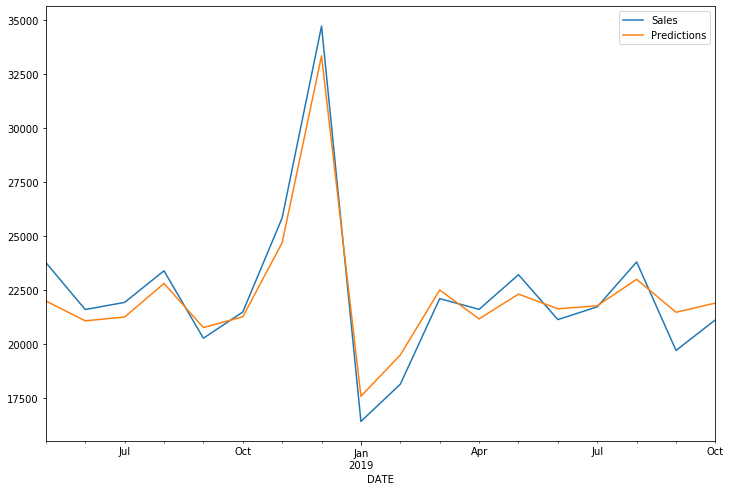

In [ ]:
test.plot(figsize=(12,8))

# Retrain and Forecasting

In [54]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [55]:
length = 12 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [56]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


# fit model
model.fit_generator(generator,epochs=8)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


AttributeError: 'Sequential' object has no attribute 'fit_generator'

In [57]:
# Instead of using fit_generator, use fit with the generator as the input
model.fit(generator, epochs=8)

Epoch 1/8
 24/322 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1164

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


322/322 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0392
Epoch 2/8
322/322 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0170
Epoch 3/8
322/322 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0114
Epoch 4/8
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0042
Epoch 5/8
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0052
Epoch 6/8
322/322 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0019
Epoch 7/8
322/322 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0014
Epoch 8/8
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0023


In [58]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):

    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]

    # store prediction
    forecast.append(current_pred)

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [59]:
forecast = scaler.inverse_transform(forecast)

### Creating new timestamp index with pandas.

In [60]:
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [61]:
forecast_index = pd.date_range(start='2019-11-01',periods=periods,freq='MS')

In [62]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                           columns=['Forecast'])

In [63]:
forecast_df

,Forecast
2019-11-01,26633.307155
2019-12-01,36520.026181
2020-01-01,17065.354478
2020-02-01,19049.243942
2020-03-01,22753.992302
2020-04-01,22295.106666
2020-05-01,23832.165866
2020-06-01,21907.239865
2020-07-01,22502.886588
2020-08-01,24429.329566


<Axes: >

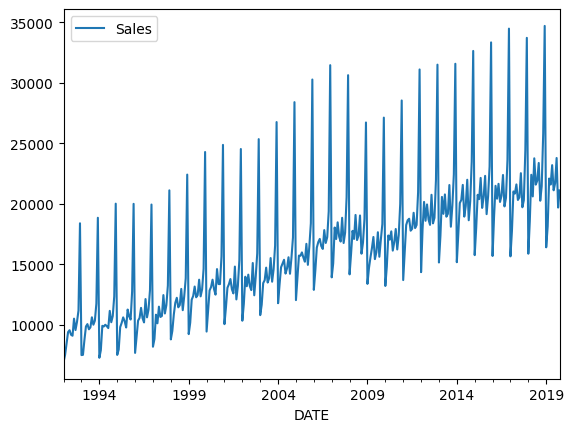

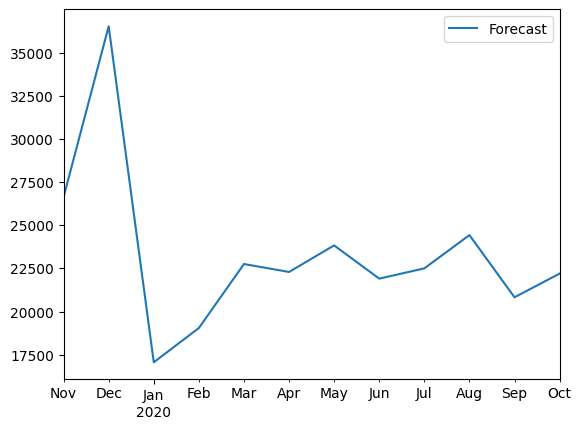

In [64]:
df.plot()
forecast_df.plot()

### Joining pandas plots

https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure

<Axes: xlabel='DATE'>

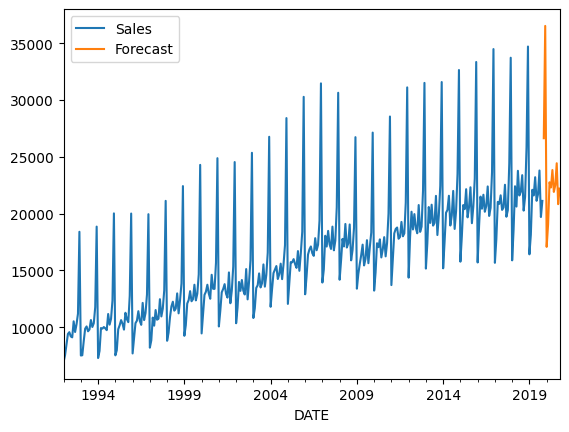

In [65]:
ax = df.plot()
forecast_df.plot(ax=ax)

(576.0, 611.0)

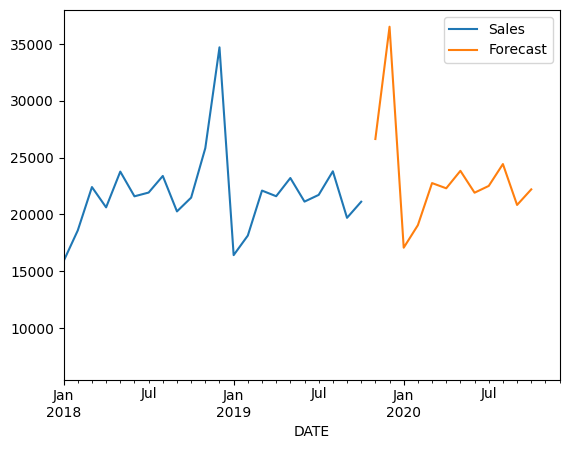

In [66]:
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2018-01-01','2020-12-01')

# Great Job!